In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rc('font',family = 'malgun gothic')
plt.rc('axes',unicode_minus = False)

# 논리게이트 AND, OR, NAND, XOR 구현

![](2023-04-11-15-56-17.png)

# 단일 퍼셉트론 (초기 신경망)의 개념 

* 단일 퍼셉트론은 하나 이상의 입력 값을 받아 단일 출력 값을 생성하는 단일 인공 뉴런으로 구성된 가장 간단한 형태의 인공 신경망 중 하나입니다. 
* 입력의 가중 합계를 취하고 편향 값을 추가하고 결과를 활성화 함수를 통해 전달하는 방식으로 작동합니다.
* 활성화 함수는 퍼셉트론이 받는 입력에 따라 퍼셉트론이 작동하는지(1 생성) 또는 작동하지 않는지(0 생성)를 결정합니다.


* 즉, 단일 퍼셉트론은 여러 입력을 수신하고 각 입력에 가중치를 곱한 다음 가중치가 적용된 모든 입력을 더하여 단일 출력을 생성합니다. 
* 그런 다음 퍼셉트론은 퍼셉트론이 실행되는지 여부를 결정하는 활성화 함수를 출력에 적용합니다.
* 가중치와 편향은 교육 과정에서 학습되며 퍼셉트론은 입력과 해당 출력의 많은 예를 제시하고 가중치와 편향을 조정하여 실제 출력과 원하는 출력 간의 차이를 최소화합니다.


* 단일 퍼셉트론은 원래 생물학적 뉴런의 모델로 도입되었으며 뇌의 뉴런이 정보를 처리하는 방식을 연구하는 데 사용되었습니다.
* 오늘날에는 입력 데이터를 기능에 따라 다른 범주로 분리하는 것이 목표인 분류 문제를 위한 기계 학습에서 일반적으로 사용됩니다.

* numerical_dervative function 에 대한 코드 출처 : https://www.youtube.com/watch?v=3ELMIbGTIDs&list=PLS8gIc2q83OjStGjdTF2LZtc0vefCAbnX&index=10
* class logitGate 출처 : https://www.youtube.com/watch?v=W0l9ttF3k-I&t=1037s

In [4]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))


def numerical_dervative(f,x):
    
    delta_x = 1e-4 
    grad = np.zeros_like(x) 
    
    it = np.nditer(x , flags = ['multi_index'], op_flags = ['readwrite']) 

    while not it.finished:
        
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = tmp_val - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2 * delta_x)
        
        x[idx] = tmp_val
        
        it.iternext()
    
    return grad 

In [5]:
class LogitGate:
    
    def __init__(self, gate_name,xdata,tdata):
        
        self_name = gate_name
        
        # 입력 데이터, 정답 데이터 초기화
        
        self.__xdata = xdata.reshape(4,2)
        self.__tdata = tdata.reshape(4,1)
        
        # 가중치 w, 바이어스 b 초기화 
        
        self.__w = np.random.rand(2,1) # 2 X 1 matrix 
        self.__b = np.random.rand(1) 
        
        self.__eta = 1e-2
        
    def __loss_func(self):
        
        delta = 1e-7 
        
        z = np.dot(self.__xdata,self.__w) + self.__b
        y = sigmoid(z)
        
        return -np.sum( self.__tdata*np.log(y + delta) + (1 - self.__tdata) * np.log((1-y) + delta))
    
    def error_val(self):
    
        delta = 1e-7 
        
        z = np.dot(self.__xdata,self.__w) + self.__b
        y = sigmoid(z)
        
        return -np.sum( self.__tdata*np.log(y + delta) + (1 - self.__tdata) * np.log((1-y) + delta))
    
    
    def train(self):
        
        f = lambda x: self.__loss_func()
        steps = 20000
        
        print('inital error value :', self.error_val())
        
        error_list = []
        
        for step in range(steps):
            
            self.__w -= self.__eta * numerical_dervative(f,self.__w)
            self.__b -= self.__eta * numerical_dervative(f,self.__b)
                        
            if step % 4000 == 0:
                
                print('step :', step, 'error_val :',self.error_val())
                
            error_list.append(self.error_val())
            
        plt.grid()
        plt.plot(range(steps),error_list)
        plt.title(f'가중치 업데이트 횟수에 따른 error 값 변화')
        plt.ylabel('error')
        plt.xlabel('iteration')
            
                
    def predict(self,input_data):
        
        predicted = []
        
        for _ in input_data:
            
            z = np.dot(_, self.__w) + self.__b
            y = sigmoid(z)
        
            if y > 0.5:
                predicted.append(1)
            else:
                predicted.append(0)
                
            
        return predicted
                
    

In [6]:
def make_plot(x,predicted,title):
    
    plt.grid()
    
    for i,var in enumerate(x):
        
        if predicted[i] == 0:
            
            plt.scatter(var[0],var[1], s =150, c = 'red', marker = '^')
        
        if predicted[i] == 1:
            
            plt.scatter(var[0],var[1], s = 150, c = 'blue', marker = 'o')
            
       
            
    plt.plot([1.5,0],[0,1.5], 'b--')
    plt.xlim([-0.5,1.5])
    plt.ylim([-0.5,1.5])
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.axvline(x = 0, c ='k')
    plt.axhline(y = 0, c = 'k')
    plt.title(title)

# 1. AND

inital error value : 3.4875466797657113
step : 0 error_val : 3.448790380844411
step : 4000 error_val : 0.38616237450927526
step : 8000 error_val : 0.20999587358443056
step : 12000 error_val : 0.14299253498950354
step : 16000 error_val : 0.10804176740689185


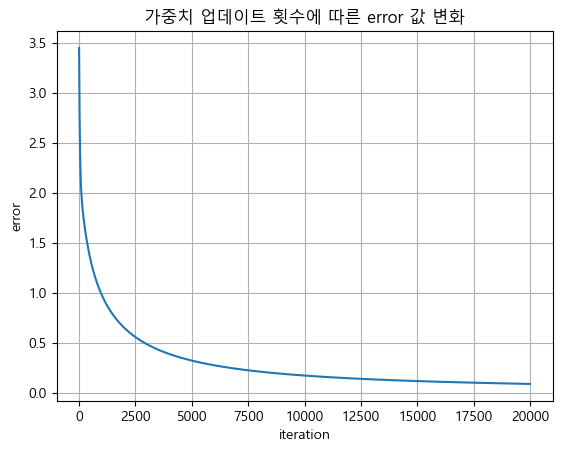

In [7]:
xdata = np.array([ [0,0], [0,1], [1,0], [1,1] ])
tdata = np.array([0,0,0,1])

AND_gate = LogitGate('AND_gate', xdata, tdata)

AND_gate.train()

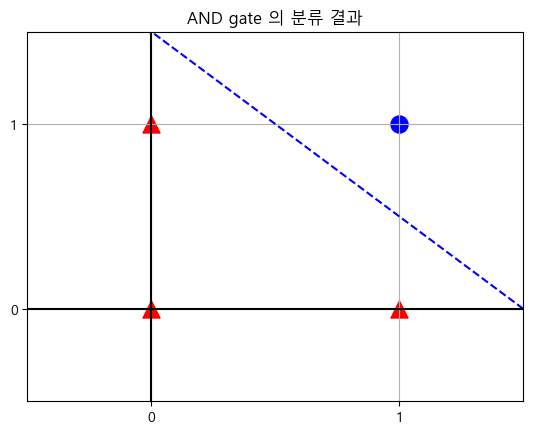

In [8]:
test_data = np.array([ [0,0], [0,1], [1,0], [1,1] ])

predicted = AND_gate.predict(test_data)

make_plot(test_data,predicted, 'AND gate 의 분류 결과')

# 2. OR

inital error value : 1.8518361340118643
step : 0 error_val : 1.8475062773618232
step : 4000 error_val : 0.23182422394651703
step : 8000 error_val : 0.11781740813641492
step : 12000 error_val : 0.07832292657934815
step : 16000 error_val : 0.058499251286616524


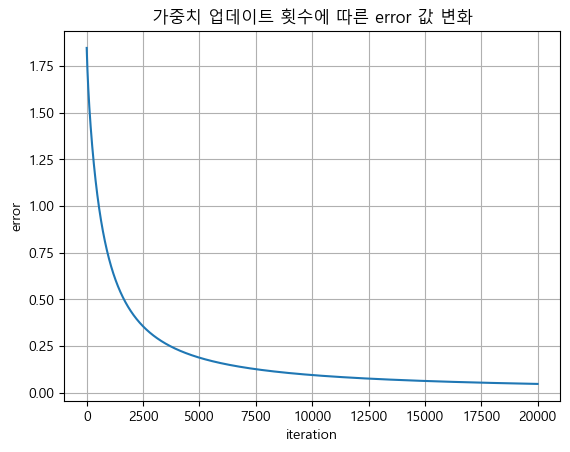

In [9]:
x_data = np.array([ [0,0], [0,1], [1,0], [1,1] ])
y_data = np.array([0,1,1,1])

OR_gate = LogitGate('OR_gate',x_data,y_data)
OR_gate.train()

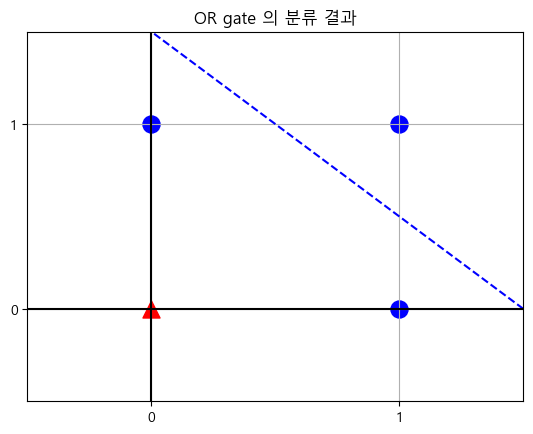

In [10]:
test_data = np.array([ [0,0], [0,1], [1,0], [1,1] ])

predicted = OR_gate.predict(test_data)

make_plot(test_data,predicted, 'OR gate 의 분류 결과')

# 3. NAND 

inital error value : 6.084698958395074
step : 0 error_val : 5.975301511180389
step : 4000 error_val : 0.2355090079256542
step : 8000 error_val : 0.1188027099202151
step : 12000 error_val : 0.07876387448434984
step : 16000 error_val : 0.05874681748765388


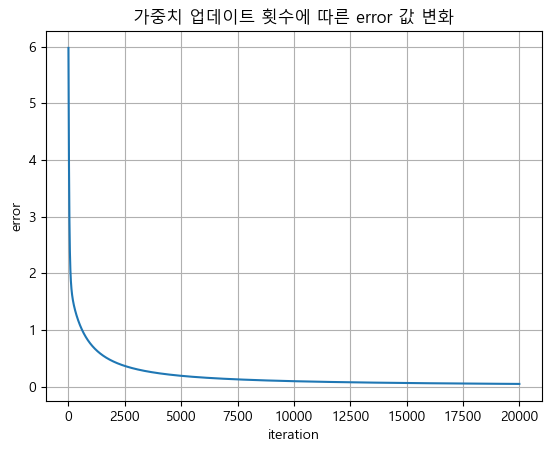

In [11]:
x_data = np.array([ [0,0], [0,1], [1,0], [1,1] ])
y_data = np.array([1,0,0,0])

NAND_gate = LogitGate('NAND_gate',x_data,y_data)
NAND_gate.train()

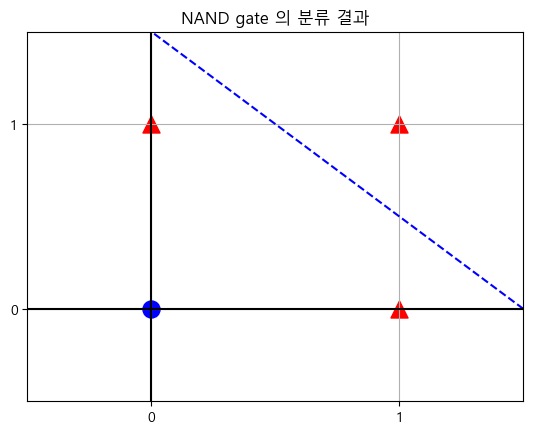

In [12]:
test_data = np.array([ [0,0], [0,1], [1,0], [1,1] ])

predicted = NAND_gate.predict(test_data)

make_plot(test_data,predicted, 'NAND gate 의 분류 결과')

* 1950년대 후반 Frank Rosenblatt가 제안한 초기 퍼셉트론 게이트는 선형 분리 가능한 분류 작업만 수행할 수 있는 단일 계층 신경망이었습니다. 
* 그러나 XOR(배타적 OR) 문제는 선형 분리가 불가능하며 단일 레이어 퍼셉트론으로 해결할 수 없습니다.


* XOR 함수는 두 개의 이진 입력을 받아 입력이 다르면(즉, 하나의 입력이 0이고 다른 입력이 1인 경우) 참인 이진 출력을 반환하고 입력이 동일한 경우(즉, 둘 다 0이거나 둘 다 1) 거짓을 반환합니다. 
* XOR의 문제는 직선 또는 선형 결정 경계로 구분할 수 없다는 것입니다.


* 즉, 입력 공간을 가능한 두 출력에 해당하는 두 영역으로 분리할 수 있는 단일 선이 없습니다. 따라서 선형 결정 경계만 학습할 수 있는 단층 퍼셉트론으로는 XOR 문제를 풀 수 없습니다.


* XOR 문제를 해결하기 위해서는 다층 퍼셉트론(MLP)이나 심층신경망(DNN)과 같은 다층 신경망이 필요합니다. 
* 이러한 네트워크는 비선형 활성화 함수로 뉴런의 여러 계층을 쌓아서 비선형 결정 경계를 학습할 수 있으며, 이를 통해 입력 데이터의 더 복잡하고 추상적인 표현을 학습할 수 있습니다.



# 4. XOR 

inital error value : 3.2179825996024047
step : 0 error_val : 3.2058763373951877
step : 4000 error_val : 2.7725879331214442
step : 8000 error_val : 2.7725879222398984
step : 12000 error_val : 2.772587922239861
step : 16000 error_val : 2.772587922239861


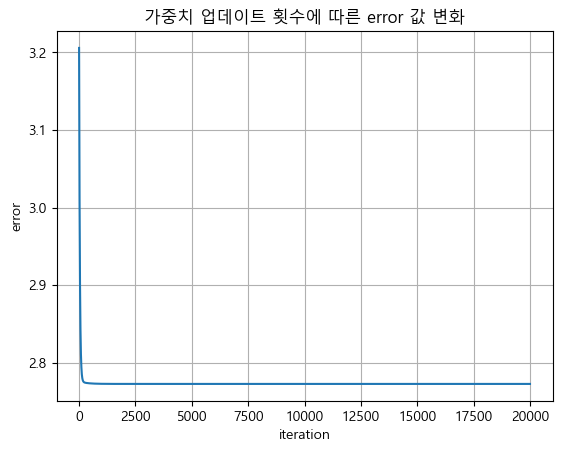

In [13]:
xdata = np.array([ [0,0], [0,1], [1,0], [1,1] ])
tdata = np.array([0,1,1,0])

XOR_gate = LogitGate('XOR_gate', xdata, tdata)

XOR_gate.train()

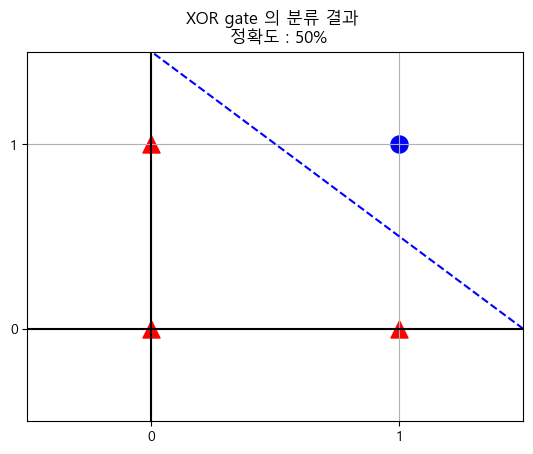

In [14]:
test_data = np.array([ [0,0], [0,1], [1,0], [1,1] ])

predicted = XOR_gate.predict(test_data)

make_plot(test_data,predicted, 'XOR gate 의 분류 결과 \n 정확도 : 50%')